In [1]:
import pandas as pd

In [19]:
data = pd.read_csv("EarthquakeDataset.csv")
data.columns

Index(['Time', 'Place', 'Latitude', 'Longitude', 'Depth', 'Mag', 'MagType',
       'nst', 'gap', 'dmin', 'rms', 'net', 'ID', 'Updated', 'Unnamed: 14',
       'Type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [20]:
data.head()

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us


In [21]:
data.describe()

,Latitude,Longitude,Depth,Mag,nst,gap,dmin,rms,Unnamed: 14,horizontalError,depthError,magError,magNst
count,37331.000000,37331.000000,37197.000000,37331.000000,7473.000000,10087.000000,4395.000000,20218.000000,0.0,3970.000000,20827.000000,16551.000000,5372.000000
mean,5.457651,38.877695,58.583346,5.948616,265.481065,45.014891,4.315178,1.000779,NaN,7.324982,10.679092,0.261882,46.974870
std,30.789822,123.090934,109.563400,0.455160,161.982149,34.311032,5.480411,0.356822,NaN,5.400729,10.660510,0.169566,60.441745
min,-77.080000,-179.997000,-4.000000,5.500000,0.000000,8.000000,0.004505,0.005000,NaN,0.085000,0.000000,0.000000,0.000000
25%,-16.519800,-75.807000,15.000000,5.600000,134.000000,24.100000,1.155000,0.890000,NaN,5.700000,3.600000,0.200000,17.000000
50%,1.153000,98.577000,28.500000,5.800000,241.000000,36.000000,2.509000,1.000000,NaN,7.100000,6.100000,0.200000,31.000000
75%,33.786000,143.347850,41.000000,6.140000,372.000000,54.800000,5.127500,1.110000,NaN,8.500000,16.200000,0.330000,55.000000
max,87.199000,180.000000,700.000000,9.500000,934.000000,360.000000,39.730000,42.410000,NaN,99.000000,569.200000,1.840000,941.000000


In [43]:
selectionData = data[['Time', 'Latitude', 'Longitude', 'Depth']]
selectionData.head()

,Time,Latitude,Longitude,Depth
0,2023-02-17T09:37:34.868Z,-6.5986,132.0763,38.615
1,2023-02-16T05:37:05.138Z,-15.0912,167.0294,36.029
2,2023-02-15T18:10:10.060Z,12.3238,123.8662,20.088
3,2023-02-15T06:38:09.034Z,-40.5465,174.5709,74.320
4,2023-02-14T13:16:51.072Z,45.1126,23.1781,10.000


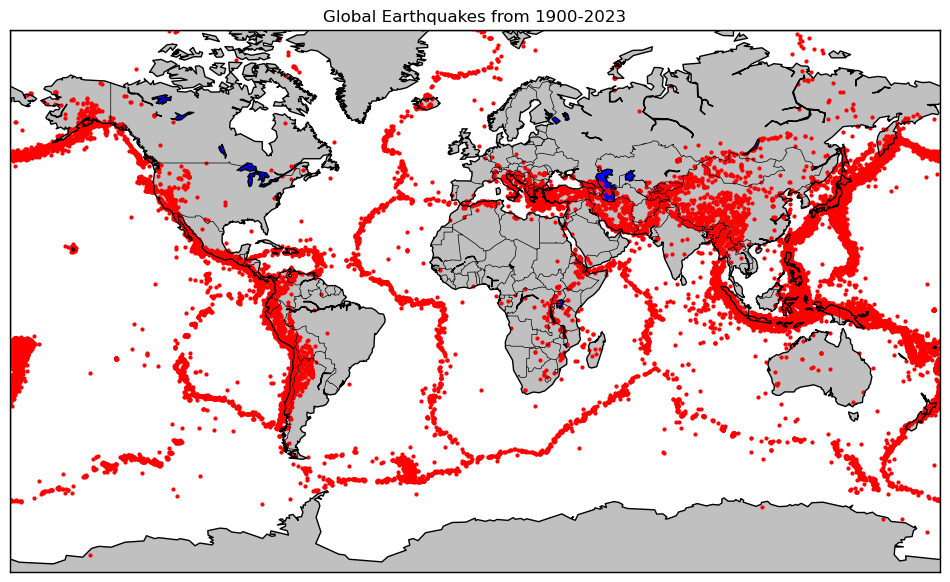

In [48]:

#import basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#init Basemap
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

#Fetch latitude and longitude
longitudes = selectionData["Longitude"].tolist()
latitudes = selectionData["Latitude"].tolist()


x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("Global Earthquakes from 1900-2023")
m.plot(x, y, "o", markersize = 2, color = 'red')
m.drawcoastlines()
m.fillcontinents(color='silver',lake_color='blue')
m.drawmapboundary()
m.drawcountries()
plt.show()